In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import KeyFunctions as me

RandState = 117

In [2]:
from sklearn.model_selection import train_test_split

#Import Full R6g Dataset
df, labels = me.ConstructCombinedDataset(3)

[train, test] = train_test_split(df, random_state = RandState, shuffle = True, train_size = 0.8)

y_tn = train.index
y_tt = test.index
X_tt = test.to_numpy()
X_tn = train.to_numpy()

In [3]:
#Scale Dataset

from sklearn.preprocessing import StandardScaler

Scale = StandardScaler()

X_tn = Scale.fit_transform(X_tn)
X_tt = Scale.transform(X_tt)

In [4]:
#Calculate Cross Validation Scores
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

df.columns = df.columns.astype(str)

RFC = RandomForestClassifier(random_state = RandState)

RFCscore = cross_val_score(RFC, X_tn, y_tn)
display("Random Forest Cross Validation")
display(RFCscore)
display(np.mean(RFCscore))

RFcv = cross_validate(RFC, X_tn, y_tn)
display(np.mean(RFcv['fit_time']))

'Random Forest Cross Validation'

array([0.63636364, 0.81818182, 0.7       , 0.7       , 0.7       ])

0.7109090909090909

0.08010034561157227

In [5]:
from sklearn.model_selection import RandomizedSearchCV

estRS = [10, 30, 50, 70, 100, 125, 150, 175, 200]
maxfeatRS = [10, 50, 90, 135, 170, 220, 275, 300, 345, 390, 450, 472]

RFRS = RandomizedSearchCV(RFC, param_distributions = {'n_estimators': estRS, 'max_features': maxfeatRS}, \
                          cv = 5, verbose = 1, random_state = RandState)
RFRS.fit(X_tn, y_tn)
display(RFRS.best_params_)
ypred = RFRS.predict(X_tt)
display(RFRS.best_score_)
display(RFRS.cv_results_['std_test_score'][RFRS.best_index_])
display(RFRS.refit_time_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 70, 'max_features': 275}

0.7290909090909092

0.11272727272727273

0.12500953674316406

In [6]:
from sklearn.model_selection import GridSearchCV

bestest = RFRS.best_params_.get('n_estimators')
bestmaxfeat = RFRS.best_params_.get('max_features')
estGS = []
maxfeatGS = []

for i in range(-3,4):
    if (bestmaxfeat+0.25*i*bestmaxfeat < 472) and (bestmaxfeat+0.25*i*bestmaxfeat > 0):
            estGS = np.append(estGS, bestest+0.25*i*bestest)
            maxfeatGS = np.append(maxfeatGS, bestmaxfeat+0.25*i*bestmaxfeat)

estGS = np.around(estGS).astype(int)
maxfeatGS = np.around(maxfeatGS).astype(int)

crite =['gini', 'entropy']

RFGS = GridSearchCV(RFC, param_grid = {'n_estimators': estGS, 'max_features': maxfeatGS, 'criterion': crite}, \
                    cv = 5, verbose = 1, error_score ='raise')
RFGS.fit(X_tn, y_tn)
display(RFGS.best_params_)
ypred = RFGS.predict(X_tt)
display(RFGS.best_score_)
display(RFRS.cv_results_['std_test_score'][RFRS.best_index_])
display(RFGS.refit_time_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'criterion': 'entropy', 'max_features': 69, 'n_estimators': 88}

0.7490909090909093

0.11272727272727273

0.13804984092712402

In [7]:
from sklearn.metrics import confusion_matrix
y_pred = RFGS.predict(X_tt)

RFcounter = 0

for i in range(len(y_tt)):
    if y_pred[i] != y_tt[i]:
        display("Incorrect Prediction at " + str(i) + ", Predicted: "+ str(y_pred[i]) + "; Actual: " + str(y_tt[i]))
        RFcounter += 1
                
display("Total Predictions: " + str(i))
display("Total Errors: " + str(RFcounter))

CMNT = confusion_matrix(y_tt, y_pred, labels = labels)

'Incorrect Prediction at 4, Predicted: 10-16; Actual: 10-11'

'Incorrect Prediction at 7, Predicted: 10-16; Actual: 10-14'

'Incorrect Prediction at 10, Predicted: 10-11; Actual: 10-9'

'Total Predictions: 12'

'Total Errors: 3'

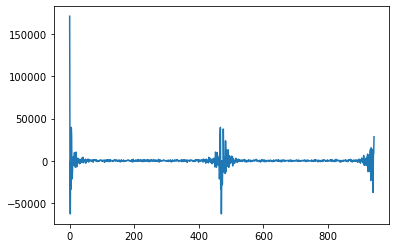

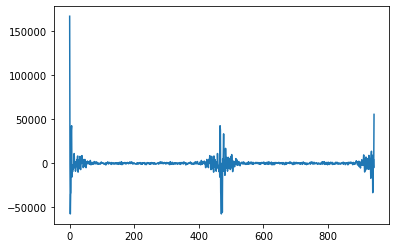

In [8]:
#Apply Fourier Transform to Training and Testing Data
#Fourier Transform Performs Best Without Scaling
X_tt = test.to_numpy()
X_tn = train.to_numpy()

X_tnf = np.fft.fft(X_tn)
X_ttf = np.fft.fft(X_tt)

#Data is stored as columns of all real values followed by columns of all imaginary values.
X_tnf = np.append(np.real(X_tnf), np.imag(X_tnf), axis = 1)
X_ttf = np.append(np.real(X_ttf), np.imag(X_ttf), axis = 1)

plt.figure()
plt.plot(X_tnf[1, :])
plt.figure()
plt.plot(X_tnf[7, :]);

In [9]:
#Calculate Cross Validation Scores
from sklearn.model_selection import cross_val_score

df.columns = df.columns.astype(str)

RFC = RandomForestClassifier(random_state = RandState)

RFCscore = cross_val_score(RFC, X_tnf, y_tn)
display("Random Forest Cross Validation")
display(RFCscore)
display(np.mean(RFCscore))

RFcv = cross_validate(RFC, X_tnf, y_tn)
display(np.mean(RFcv['fit_time']))

'Random Forest Cross Validation'

array([0.81818182, 0.90909091, 0.9       , 0.8       , 0.9       ])

0.8654545454545456

0.07646389007568359

In [10]:
from sklearn.model_selection import RandomizedSearchCV

estRS = [10, 30, 50, 70, 100, 125, 150, 175, 200]
maxfeatRS = [10, 50, 135, 240, 400, 490, 560, 620, 750, 850, 940]

RFRS = RandomizedSearchCV(RFC, param_distributions = {'n_estimators': estRS, 'max_features': maxfeatRS},\
                          cv = 5, verbose = 1, random_state = RandState)
RFRS.fit(X_tnf, y_tn)
display(RFRS.best_params_)
ypred = RFRS.predict(X_ttf)
display(RFRS.best_score_)
display(RFRS.cv_results_['std_test_score'][RFRS.best_index_])
display(RFRS.refit_time_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 50, 'max_features': 240}

0.9036363636363637

0.004453617714151208

0.07810497283935547

In [11]:
from sklearn.model_selection import GridSearchCV

bestest = RFRS.best_params_.get('n_estimators')
bestmaxfeat = RFRS.best_params_.get('max_features')
estGS = []
maxfeatGS = []

for i in range(-3,4):
    if (bestmaxfeat+0.25*i*bestmaxfeat < 472) and (bestmaxfeat+0.25*i*bestmaxfeat > 0):
        estGS = np.append(estGS, bestest+0.25*i*bestest)
        maxfeatGS = np.append(maxfeatGS, bestmaxfeat+0.25*i*bestmaxfeat)

estGS = np.around(estGS).astype(int)
maxfeatGS = np.around(maxfeatGS).astype(int)

crite =['gini', 'entropy']

RFGS = GridSearchCV(RFC, param_grid = {'n_estimators': estGS, 'max_features': maxfeatGS, 'criterion': crite}, \
                    cv = 5, verbose = 1, error_score ='raise')
RFGS.fit(X_tnf, y_tn)
display(RFGS.best_params_)
ypred = RFGS.predict(X_ttf)
display(RFGS.best_score_)
display(RFRS.cv_results_['std_test_score'][RFRS.best_index_])
display(RFGS.refit_time_)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


{'criterion': 'entropy', 'max_features': 180, 'n_estimators': 38}

0.9054545454545455

0.004453617714151208

0.09373164176940918

In [12]:
y_pred = RFGS.predict(X_ttf)

RFcounter = 0

for i in range(len(y_tt)):
    if y_pred[i] != y_tt[i]:
        display("Incorrect Prediction at " + str(i) + ", Predicted: "+ str(y_pred[i]) + "; Actual: " + str(y_tt[i]))
        RFcounter += 1
                
display("Total Predictions: " + str(i))
display("Total Errors: " + str(RFcounter))

CMFT = confusion_matrix(y_tt, y_pred, labels = labels)

'Incorrect Prediction at 3, Predicted: 10-16; Actual: 10-14'

'Incorrect Prediction at 4, Predicted: 10-16; Actual: 10-11'

'Incorrect Prediction at 9, Predicted: 10-16; Actual: 10-11'

'Incorrect Prediction at 10, Predicted: 10-11; Actual: 10-9'

'Total Predictions: 12'

'Total Errors: 4'

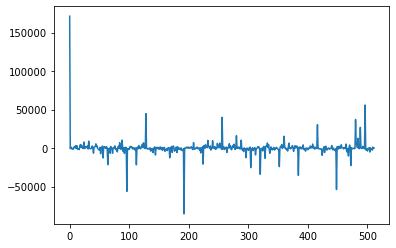

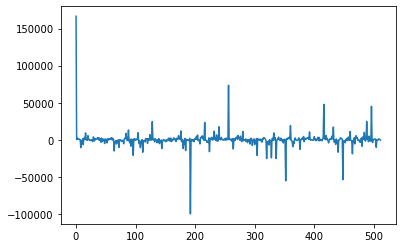

In [13]:
#Apply Welsh-Hadamard Transform to Training and Testing Data
from sympy.discrete.transforms import fwht, ifwht
X_tt = test.to_numpy()
X_tn = train.to_numpy()

X_tnh = np.apply_along_axis(fwht, axis=1, arr=X_tn)
X_tth = np.apply_along_axis(fwht, axis=1, arr=X_tt)

plt.figure()
plt.plot(X_tnh[1, :])
plt.figure()
plt.plot(X_tnh[7, :]);

In [14]:
#Calculate Cross Validation Scores
from sklearn.model_selection import cross_val_score

df.columns = df.columns.astype(str)

RFC = RandomForestClassifier(random_state = RandState)

RFCscore = cross_val_score(RFC, X_tnh, y_tn)
display("Random Forest Cross Validation")
display(RFCscore)
display(np.mean(RFCscore))

RFcv = cross_validate(RFC, X_tnh, y_tn)
display(np.mean(RFcv['fit_time']))

'Random Forest Cross Validation'

array([0.63636364, 0.90909091, 1.        , 0.8       , 0.9       ])

0.8490909090909092

0.10940022468566894

In [15]:
from sklearn.model_selection import RandomizedSearchCV

estRS = [10, 30, 50, 70, 100, 125, 150, 175, 200]
maxfeatRS = [10, 50, 90, 135, 170, 220, 275, 300, 390, 450, 472, 512]

RFRS = RandomizedSearchCV(RFC, param_distributions = {'n_estimators': estRS, 'max_features': maxfeatRS},\
                          cv = 5, verbose = 1, random_state = RandState)
RFRS.fit(X_tnh, y_tn)
display(RFRS.best_params_)
ypred = RFRS.predict(X_tth)
display(RFRS.best_score_)
display(RFRS.cv_results_['std_test_score'][RFRS.best_index_])
display(RFRS.refit_time_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 175, 'max_features': 300}

0.850909090909091

0.15731213379144196

0.34892892837524414

In [16]:
from sklearn.model_selection import GridSearchCV

bestest = RFRS.best_params_.get('n_estimators')
bestmaxfeat = RFRS.best_params_.get('max_features')
estGS = []
maxfeatGS = []

for i in range(-3,4):
    if (bestmaxfeat+0.25*i*bestmaxfeat < 472) and (bestmaxfeat+0.25*i*bestmaxfeat > 0):
        estGS = np.append(estGS, bestest+0.25*i*bestest)
        maxfeatGS = np.append(maxfeatGS, bestmaxfeat+0.25*i*bestmaxfeat)

estGS = np.around(estGS).astype(int)
maxfeatGS = np.around(maxfeatGS).astype(int)

crite =['gini', 'entropy']

RFGS = GridSearchCV(RFC, param_grid = {'n_estimators': estGS, 'max_features': maxfeatGS, 'criterion': crite}, \
                    cv = 5, verbose = 1, error_score ='raise')
RFGS.fit(X_tnh, y_tn)
display(RFGS.best_params_)
ypred = RFGS.predict(X_tth)
display(RFGS.best_score_)
display(RFRS.cv_results_['std_test_score'][RFRS.best_index_])
display(RFGS.refit_time_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'criterion': 'gini', 'max_features': 75, 'n_estimators': 44}

0.8872727272727273

0.15731213379144196

0.09688591957092285

In [17]:
y_pred = RFGS.predict(X_tth)

RFcounter = 0

for i in range(len(y_tt)):
    if y_pred[i] != y_tt[i]:
        display("Incorrect Prediction at " + str(i) + ", Predicted: "+ str(y_pred[i]) + "; Actual: " + str(y_tt[i]))
        RFcounter += 1
                
display("Total Predictions: " + str(i))
display("Total Errors: " + str(RFcounter))

CMHT = confusion_matrix(y_tt, y_pred, labels = labels)

'Incorrect Prediction at 3, Predicted: 10-16; Actual: 10-14'

'Incorrect Prediction at 4, Predicted: 10-16; Actual: 10-11'

'Incorrect Prediction at 9, Predicted: 10-16; Actual: 10-11'

'Total Predictions: 12'

'Total Errors: 3'

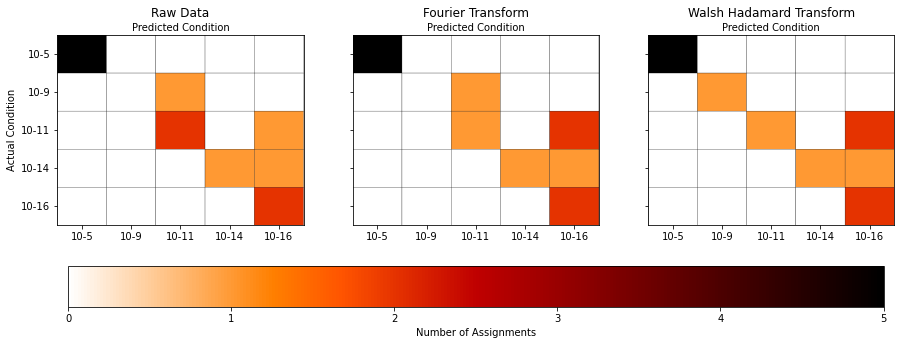

In [18]:

fig, axs = plt.subplots(1, 3, sharey = True, figsize = [15, 5])

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

pcm = axs[0].pcolor(CMNT, edgecolors = 'k', cmap = 'gist_heat_r')
plt.gca().invert_yaxis()
axs[0].set_xticks(ticks = np.linspace(0.5, len(labels)-0.5, num = len(labels)), labels = labels)
axs[0].set_yticks(ticks = np.linspace(0.5, len(labels)-0.5, num = len(labels)), labels = labels)
axs[0].set_ylabel("Actual Condition")
axs[0].set_xlabel("Predicted Condition")
axs[0].xaxis.set_label_position('top') 
axs[0].set_title('Raw Data');

axs[1].pcolor(CMFT, edgecolors = 'k', cmap = 'gist_heat_r');
plt.gca().invert_yaxis()
axs[1].set_xticks(ticks = np.linspace(0.5, len(labels)-0.5, num = len(labels)), labels = labels)
axs[1].set_title('Fourier Transform');
axs[1].set_xlabel("Predicted Condition")
axs[1].xaxis.set_label_position('top')

axs[2].pcolor(CMHT, edgecolors = 'k', cmap = 'gist_heat_r')
plt.gca().invert_yaxis()
axs[2].set_xticks(ticks = np.linspace(0.5, len(labels)-0.5, num = len(labels)), labels = labels);
axs[2].set_title('Walsh Hadamard Transform');
axs[2].set_xlabel("Predicted Condition")
axs[2].xaxis.set_label_position('top')

fig.colorbar(pcm, ax = axs[:], location = 'bottom', label = 'Number of Assignments');

In [19]:
display(CMHT)

array([[5, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 2],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 2]], dtype=int64)